## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')
pods = pd.read_csv('data/POD_ids.csv')

In [3]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [4]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [5]:
infile = open('pods_open_total2','rb')
pods_total = pickle.load(infile)
infile.close()

In [6]:
infile = open('pods_open_minmax2','rb')
pods_minmax = pickle.load(infile)
infile.close()

In [7]:
infile = open('pods_flood_total2','rb')
pods_flood_total2 = pickle.load(infile)
infile.close()

In [8]:
infile = open('pods_flood_minmax2','rb')
pods_flood_minmax2 = pickle.load(infile)
infile.close()

In [9]:
infile = open('pods_anthrax_total','rb')
pods_anthrax_total = pickle.load(infile)
infile.close()

In [10]:
infile = open('pods_anthrax_minmax2','rb')
pods_anthrax_minmax2 = pickle.load(infile)
infile.close()

### Population

#### Analysis of population served by each POD in global model (disease outbreak)

#### Minimize total distance model

In [24]:
population.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax,global
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0,1
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0,1
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9,1
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7,1
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0,1


In [39]:
# set number of pods to open (10-47)
num_pods_open = 19

In [40]:
#Merge population and pod data frames
pods_open_total = pd.DataFrame(pods_total[num_pods_open])
pods_open_total.columns = ["bg","pod"]

pods_open_total['bg'] = pods_open_total['bg'] + 1
pods_open_total['pod'] = pods_open_total['pod'] + 1

pods_open_total = pd.merge(population,
                     pods_open_total,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

In [41]:
# export pods open DataFrame to csv
pods_open_total.to_csv ('data/total_19PODs_BGassignment.csv', index = False, header=True)

pods_open_total.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax,global,bg,pod
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0,1,1,7
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0,1,2,7
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9,1,3,31
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7,1,4,31
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0,1,5,28


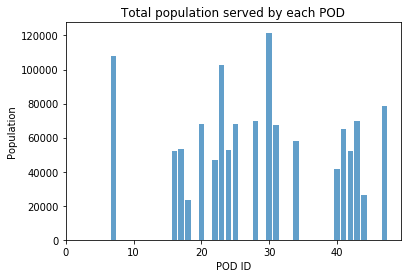

The average number of people served by a POD is 64,532


In [42]:
pods_open_total = pods_open_total.groupby("pod").population.sum().reset_index()

plt.bar(pods_open_total['pod'], pods_open_total['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.xlim(0)
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_open_total['population'])))

In [43]:
pods_open_total.to_csv ('data/total_19PODs_popbypod.csv', index = False, header=True)

pods_open_total

,pod,population
0,7,107853
1,16,51976
2,17,53169
3,18,23642
4,20,68028
5,22,47010
6,23,102648
7,24,53014
8,25,68001
9,28,69693


#### Minimize maximum distance model

In [44]:
#Merge population and pod data frames
pods_open_minmax = pd.DataFrame(pods_minmax[num_pods_open])
pods_open_minmax.columns = ["bg","pod"]

pods_open_minmax['bg'] = pods_open_minmax['bg'] + 1
pods_open_minmax['pod'] = pods_open_minmax['pod'] + 1

pods_open_minmax = pd.merge(population,
                     pods_open_minmax,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

In [45]:
#export pods open DataFrame to csv
pods_open_minmax.to_csv ('data/minmax_19PODs_BGassignment.csv', index = False, header=True)

pods_open_minmax.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,flood,anthrax,global,bg,pod
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,0,1.0,1,1,5
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,0,1.0,1,2,5
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,0,0.9,1,3,30
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,0,0.7,1,4,30
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,0,1.0,1,5,1


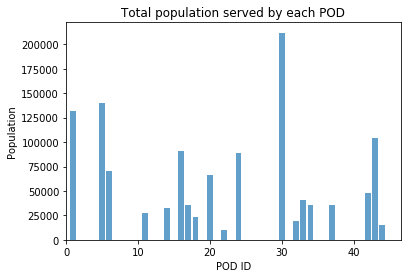

The average number of people served by a POD is 64,532


In [46]:
pods_open_minmax = pods_open_minmax.groupby("pod").population.sum().reset_index()

plt.bar(pods_open_minmax['pod'], pods_open_minmax['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.xlim(0)
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_open_minmax['population'])))

In [47]:
#export data to csv
pods_open_minmax.to_csv ('data/minmax_19PODs_popbypod.csv', index = False, header=True)

pods_open_minmax

,pod,population
0,1,131853
1,5,139845
2,6,70199
3,11,27060
4,14,32374
5,16,90658
6,17,35857
7,18,23469
8,20,66284
9,22,10200


### Number of cars and distance between block group and PODs

Analysis on number of households with no car and distance between block group and 
avg distance between POD and its selected BGs

In [ ]:
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]
pods_open.head()

In [ ]:
bg_pod_dist = []
    
for i in np.arange(0,len(pods_open)):    
    bg_pod_dist.append(dist_miles.iloc[pods_open.iloc[i,0],(pods_open.iloc[i,1]-1)])

bg_pod_dist = pd.merge(pods_open, 
                pd.DataFrame(bg_pod_dist), 
                left_index=True, 
                right_index=True)

bg_pod_dist.columns = ["bg","pod","distance"]

In [ ]:
bg_pod_dist = pd.merge(population,
                bg_pod_dist,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

# calculate proportion of households with no car
bg_pod_dist['prop_hh_no_car'] = bg_pod_dist['hh_no_car']/bg_pod_dist['num_hhs']
bg_pod_dist.head()

In [ ]:
pod_no_car = bg_pod_dist.groupby("pod").hh_no_car.sum().reset_index()
print(pod_no_car)

plt.bar(pod_no_car['pod'], pod_no_car['hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Number of HHs with No Car')
plt.xlabel('POD ID')
plt.title('Number of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("The average number of households with no car is",  "{:,.0f}".format(np.average(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the highest number of households with no car:",  "{:,.0f}".format(np.max(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the lowest number of households with no car is",  "{:,.0f}".format(np.min(pod_no_car['hh_no_car'])))

In [ ]:
pod_prop_no_car = bg_pod_dist.groupby("pod").prop_hh_no_car.mean().reset_index()
print(pod_prop_no_car)

plt.bar(pod_prop_no_car['pod'], pod_prop_no_car['prop_hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Percentage')
plt.xlabel('POD ID')
plt.title('Percent of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("Average percentage of households with no car is",  "{:,.2f}".format(np.average(pod_prop_no_car['prop_hh_no_car'])), ".")
print("The POD with the highest percentage of households with no car is",  "{:,.2f}".format(np.max(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")
print("The POD with the lowest percentage of households with no car is",  "{:,.2f}".format(np.min(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")

In [ ]:
pod_dist = bg_pod_dist.groupby("pod").distance.mean().reset_index()
print(pod_dist)

plt.bar(pod_dist['pod'], pod_dist['distance'],align='center', alpha=0.7)
plt.ylabel('Distance (miles)')
plt.xlabel('POD ID')
plt.title('Average Distance between POD and Assigned Block Groups (Miles)')
plt.show()

# add POD id #
print("The average distance between a POD and Block Group is",  "{:,.2f}".format(np.average(pod_dist["distance"])), "miles")
print("POD X has the lowest average distance between POD and block group at",  "{:,.2f}".format(np.min(pod_dist["distance"])), "miles")
print("POD X has the highest average distance between POD and block group at",  "{:,.2f}".format(np.max(pod_dist["distance"])), "miles")


### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())